In [49]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import re
import matplotlib.patches as patches

In [14]:
# parameters
d_p = 2e-3
rho_p = 0.08375
mu = 0.001
gamma = 0.01
Ring_radius = 0.02
g = 9.81

St = rho_p * d_p**2 * gamma / (12*mu*(Ring_radius**2))
Fr = 3*gamma / np.sqrt(4*g*(Ring_radius**3))
print('Stokes number:', St, 'Froude number:', Fr)

# simulation parameters
N_inf = 15 ** 3
dt = 0.3
St0 = 0.25
R0 = 1


Stokes number: 0.0006979166666666667 Froude number: 1.6932136536964906


Load data in the `.pkl` and `.npy` files

In [52]:
N_realisation = 7
directory = '../noInflux_random_sims/N_realisation_{}/'.format(N_realisation)


with open(os.path.join(directory, 'collision_series.pkl'), 'rb') as f:
    collision_series = pickle.load(f) 

with open(os.path.join(directory, 'masters_slaves_series.pkl'), 'rb') as f:
    masters_slaves_series = pickle.load(f)


files = sorted([file for file in os.listdir(directory) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))

# directory_b = '../influx_random_sims_contInjection/N_realisation_54_bounce/'
# with open(os.path.join(directory_b, 'collision_series.pkl'), 'rb') as f:
#     collision_series_b = pickle.load(f)
# with open(os.path.join(directory_b, 'masters_slaves_series.pkl'), 'rb') as f:
#     masters_slaves_series_b = pickle.load(f)

# files_b = sorted([file for file in os.listdir(directory_b) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))

In [16]:
# for n, file in enumerate(files):
#     data = np.load(os.path.join(directory, file))

#     fig, ax = plt.subplots()
#     this_ax = ax
#     marker_size = (data[:, -1] * 3/8 +0.625)
#     this_ax.scatter(data[:, 1], data[:, 2], s=marker_size**0.5, marker='o', c='k', linewidths=0)
#     circle = patches.Circle((0, 0), radius=1, fill=False, color='r')
#     this_ax.add_patch(circle)
#     this_ax.set_xlim([-2, 2])
#     this_ax.set_ylim([-2, 2])
#     this_ax.set_aspect('equal')
#     this_ax.set_title('volume-weighted-average Coalescence at t = {:.3f}'.format(n*dt))
#     plt.savefig(os.path.join(directory, 'frame_{}.png'.format(n)), dpi=300)
#     plt.close()

In [17]:
# import cv2
# def create_movie_from_frames(target, frame_folder, output_path, fps=3):
#     frame_files = [f for f in os.listdir(frame_folder) if f.endswith('.png') and f.startswith(target)]
#     frame_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))  

#     frame = cv2.imread(os.path.join(frame_folder, frame_files[0]))
#     height, width, _ = frame.shape
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use other codecs like 'XVID'
#     video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

#     for frame_file in frame_files:
#         frame = cv2.imread(os.path.join(frame_folder, frame_file))
#         video_writer.write(frame)

#     video_writer.release()

# target = 'frame'
# output_path = 'output_' + target +'_realisation_' + str(46)+ '_Fr5.mp4'
# create_movie_from_frames(target, directory, output_path)

In [18]:
# destiny = np.vstack([data[:, 0], np.zeros(len(data),)]).T

# f = 1
# slaves = masters_slaves_series[f].values()
# masters = masters_slaves_series[f].keys()
# slave = list(slaves)[0]
# master = list(masters)[0]
# slave_row = np.where(data[:, 0] == slave)[0].astype(int)[0]
# destiny[slave_row, 1] = master
# masters_slaves_series[1]

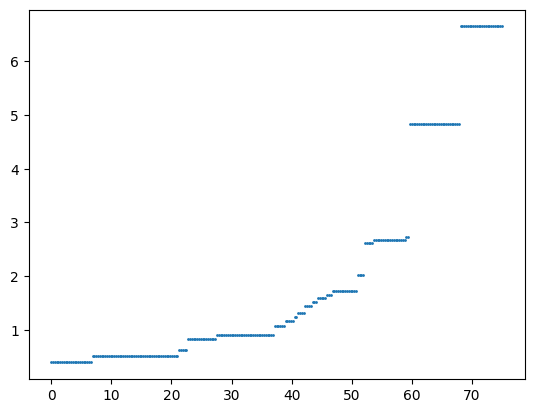

In [62]:
capture_eff_vol = []
capture_eff_num = []
capture_eff_amb = []
max_stokes = []

for n, file in enumerate(files):

    # if n == 0:
    #     data = np.load(os.path.join(directory, file))
    #     inside = data[:, 0] ** 2 + data[:, 1] ** 2 + data[:,2]**2 <= R0**2
    #     inside_stokes = data[inside, -1]
    #     inside_stokes_prev = inside_stokes.copy()
    #     data_prev = data.copy()
    #     continue

    data = np.load(os.path.join(directory, file))
    inside = data[:, 1] ** 2 + data[:, 2] ** 2 + data[:,3]**2 <= R0**2
    inside_stokes = data[inside, -1]


    # capture_eff_vol.append((np.sum((inside_stokes**1.5)) - np.sum((inside_stokes_prev**1.5))) / ((St0**1.5) * N_inf * dt * np.pi /480))
    capture_eff_vol.append((48/np.pi) * np.sum((inside_stokes**1.5)) / ((St0**1.5) * N_inf ))
    capture_eff_num.append((3/np.pi)*np.sum(inside) / N_inf)
    capture_eff_amb.append(np.sum(inside_stokes**1.5) / np.sum(data[~inside, -1]**1.5))
    max_stokes.append(np.max(inside_stokes))

    # data_prev = data.copy()
    # inside_stokes_prev = inside_stokes.copy()   

# plt.scatter(np.arange(len(capture_eff_vol)) * dt, capture_eff_vol, s=0.1)  
# plt.scatter(np.arange(len(capture_eff_num)) * dt, capture_eff_num, s=0.1)
# plt.scatter(np.arange(len(capture_eff_amb)) * dt, capture_eff_amb, s=0.1)
plt.scatter(np.arange(len(max_stokes)) * dt, max_stokes, s=1)


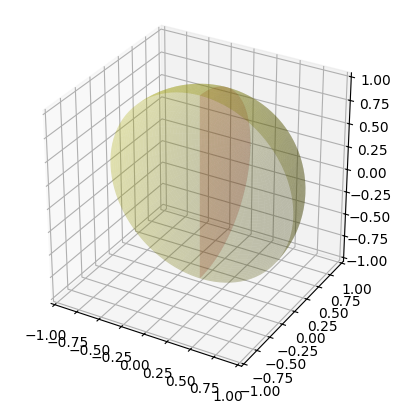

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi/2, 100)
x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.ones(np.size(u)), np.cos(v))
z = np.outer(np.cos(u), np.sin(v))
ax.plot_surface(x, y, z, color='y', alpha=0.3, label='Sphere')
x_plane = np.zeros_like(y)  # Constant x values
ax.plot_surface(x_plane, y, z, color='r', alpha=0.1, label='y-z plane')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_aspect('equal')


In [36]:
out = x[y>0].reshape

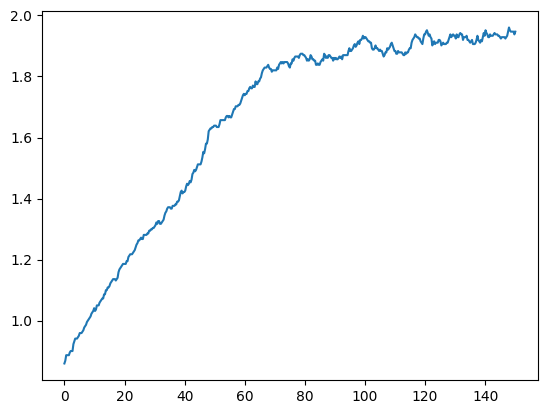

In [20]:
R0 = 1
dt = 0.3
K = 1e7

# number per volume (normalized by R0**3)
phi_inf = (15/(4*R0)) ** 3 

perc = []
numbers = []
volumes = []
volume_perc = []
max_st = []
vol_density = []
possible_st = []
phi_ratio_t = []
capture_eff_num = []    

perc_b = []
numbers_b = []
volumes_b = []
volume_perc_b = []
max_st_b = []
vol_density_b = []
possible_st_b = []



for f, file in enumerate(files):
    data = np.load(os.path.join(directory, file))
    inside = data[:, 0] ** 2 + data[:, 1] ** 2 + data[:,2]**2 <= R0**2
    inside_stokes = data[inside, -1]
    phi_in = np.sum(inside) / (4/3 * np.pi * R0**3)
    V_sweep = (np.pi * R0 **2) * (2*R0**2/15) * dt * (f+1)
    capture_eff_num.append(np.sum(inside) / (phi_inf * V_sweep))
    inside_volume = np.sum(inside_stokes ** 1.5)
    perc.append(np.sum(inside) / len(inside))
    numbers.append(np.sum(inside))
    volumes.append(inside_volume)
    volume_perc.append(inside_volume / np.sum(data[:, -1] ** 1.5))
    max_st.append(np.max(inside_stokes) if len(inside_stokes) > 0 else None)
    vol_density.append(np.sum((inside_stokes / K) ** 1.5) / (R0**3))
    phi_ratio_t.append(phi_in/phi_inf)

    previous_inside = data.copy()[inside.copy()]

    # if f > 0:
    #     flux_in = np.sum(inside) - np.sum()
    #     flux_out = np.sum(~inside & previous_inside)


plt.plot(np.arange(len(phi_ratio_t)) * dt, phi_ratio_t)
# plt.plot(np.arange(len(capture_eff_num)) * dt, capture_eff_num)

# for f, file in enumerate(files_b):
#     data = np.load(os.path.join(directory_b, file))
#     inside = data[:, 1] ** 2 + data[:, 2] ** 2 < R0
#     inside_stokes = data[inside, -1]
#     inside_volume = np.sum(inside_stokes ** 1.5)
#     perc_b.append(np.sum(inside) / len(inside))
#     numbers_b.append(np.sum(inside))
#     volumes_b.append(inside_volume)
#     volume_perc_b.append(inside_volume / np.sum(data[:, -1] ** 1.5))
#     max_st_b.append(np.max(inside_stokes) if len(inside_stokes) > 0 else None)
#     vol_density_b.append(np.sum((inside_stokes / K) ** 1.5) / (R0**3))




# fig, ax = plt.subplots(3, 2, figsize=(15, 12))
# ax[0,1].plot(np.arange(len(perc)) * dt, perc, '--', label='0', markersize=1)
# # ax[0,1].plot(np.arange(len(perc_b)) * dt, perc_b, '--', label='0', markersize=1)
# ax[0,1].set_title('percentage of particles inside')
# ax[0,1].set_xlabel('tau_f')
# ax[0,0].plot(np.arange(len(numbers))* dt, numbers/numbers[0], '--', label='no bounce',markersize=1)
# # ax[0,0].plot(np.arange(len(numbers_b))* dt, numbers_b/numbers_b[0], '--', label='bounce',markersize=1)
# ax[0,0].set_title('number of particles inside')
# ax[0,0].legend(['no bounce', 'bounce'])
# ax[1,0].plot(np.arange(len(volumes))* dt, volumes/volumes[0], '--', label='0', markersize=1)
# # ax[1,0].plot(np.arange(len(volumes_b))* dt, volumes_b/volumes_b[0], '--', label='0', markersize=1)
# ax[1,0].set_title('Volume of particles inside')
# ax[1,1].plot(np.arange(len(volume_perc))* dt, volume_perc, '--', label='0',markersize=1)
# # ax[1,1].plot(np.arange(len(volume_perc_b))* dt, volume_perc_b, '--', label='0',markersize=1)
# ax[1,1].set_title('Volume percentage of particles inside')
# ax[2,0].plot(np.arange(len(max_st))* dt, max_st, 'o', label='0', markersize=1)
# # ax[2,0].plot(np.arange(len(max_st_b))* dt, max_st_b, 'o', label='0', markersize=1)
# ax[2,0].set_title('Max Stokes inside')
# ax[2,1].plot(np.arange(len(vol_density))* dt, vol_density, 'o', label='0', markersize=1)
# # ax[2,1].plot(np.arange(len(vol_density_b))* dt, vol_density_b, 'o', label='0', markersize=1)

# plt.show()


KeyboardInterrupt: 

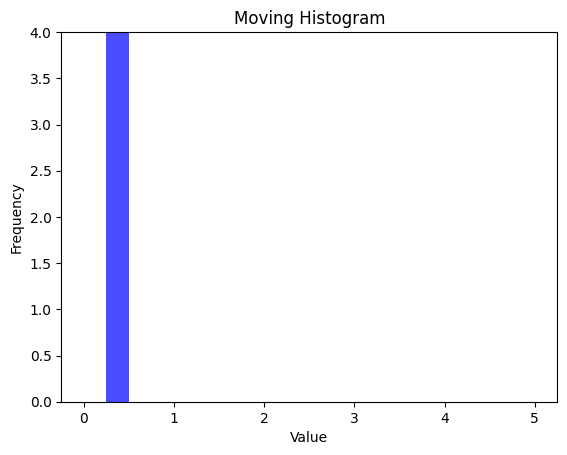

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and axis
fig, ax = plt.subplots()
x_data = []

# Set the desired x-axis range
x_min = 0
x_max = 5
ax.set_xlim(x_min, x_max)

# Function to update the histogram
def update(frame):
    # Generate some random data for each frame
    data = np.load(os.path.join(directory, files[frame]))
    inside = data[:, 1] ** 2 + data[:, 2] ** 2 < R0
    stokes = data[inside, -1]
    x_data.append(stokes)
    
    # Update the histogram with the new data
    ax.clear()
    ax.hist(stokes, bins=20, color='blue', alpha=0.7, range=(x_min, x_max), density=True)
    ax.set_ylim(0, 4)
    ax.set_title('Moving Histogram')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(files)), repeat=False)

# Save the animation as a GIF
ani.save('moving_histogram.mp4', writer='ffmpeg', dpi=300)

# plt.show()  # optional, this line can be removed if you don't want to display the animation


[]

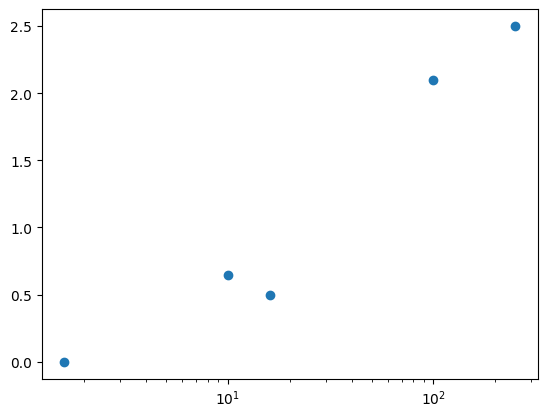

In [ ]:
st0 = np.array([0.25, 0.25, 0.01, 2.5, 0.25, 2.5, 2.5, 0.1])
fr = np.array([5, 2, 5, 5, 10, 10, 2, 5])
param = fr**2 / st0
vol_change = np.array([2.1, 0.5, None, 0.65, None, None, 0, 2.5])
type = ['increase', 'decrease', 'no plateau', 'decrease', 'no plateau', 'no plateau', 'decrease', 'increase']
plt.plot(param, vol_change, 'o')
plt.semilogx()

[]

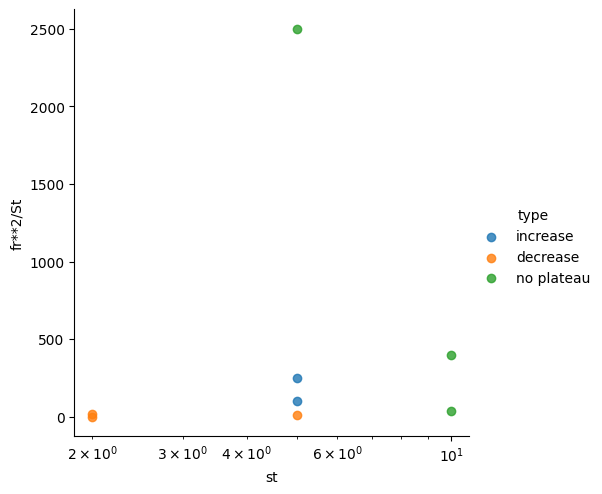

In [ ]:
import seaborn as sns
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'st': fr,
    'fr**2/St': param,
    'type': type
})

# Create a scatter plot with a linear fit
sns.lmplot(x='st', y='fr**2/St', hue='type', data=df, fit_reg=False, logx=True)
plt.semilogx()